In [1]:
import pandas as pd
from pickle import NONE
from re import T
import re
import pandas as pd
import json
import glob
import os 
import argparse
import logging
import numpy as np
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt



In [3]:
# {'sst': {'mbert': {'Attention_Suff':
def remove_a_model_dict(dict, model_to_delete):
    dataset_list=list(dict.keys())
    for a_dataset in dataset_list:
        print(a_dataset)
        model_list = list(dict[a_dataset].keys())
        for a_model in model_list:
            if a_model == model_to_delete:
                print(' FOND ONE')
                dict[a_dataset].pop(model_to_delete, None)
    with open(file_name, 'wb') as f:
        pickle.dump(loaded_dict, f)
    return dict



def remove_a_dataset_dict(dict, dataset_to_delete):
    print(len(dict.keys()))
    dataset_in_the_dict = list(dict.keys())
    for a_dataset in dataset_in_the_dict:
        if a_dataset == dataset_to_delete:
            print(f' FOND ONE: {a_dataset}')
            dict.pop(a_dataset, None)
    with open(file_name, 'wb') as f:
        pickle.dump(loaded_dict, f)
    print(len(dict.keys()))


def remove_a_dataset_model_dict(dict, dataset_to_delete, model_to_delete):
    dict[dataset_to_delete].pop(model_to_delete, None)
    with open(file_name, 'wb') as f:
        pickle.dump(loaded_dict, f)


def find_key_by_value(dictionary, value):
    for key, values in dictionary.items():
        if value in values: return key
    return None  # Return None if the value is not found in any list

In [4]:
english_data_list = ['sst', 'agnews', 'multirc']
hindi_data_list = ['hindi_xnli', 'hindi_bbc_nli', 'hindi_bbc_topic']
chinese_data_list = ['ChnSentiCorp', 'csl', 'ant']  # chinese_xnli csl
spanish_data_list = ['spanish_csl', 'spanish_paws', 'spanish_xnli']
french_data_list = ['french_csl', 'french_paws', 'french_xnli']

language_data_dict = {'English': english_data_list, 
                      'Hindi': hindi_data_list,
                      'Chinese': chinese_data_list,
                      'Spanish': spanish_data_list,
                      'French': french_data_list,
                      }

all_data_list = english_data_list+chinese_data_list+spanish_data_list+french_data_list+hindi_data_list

FA_rep_dict={'Attention': '$\\alpha$', 'Scaled_Attention': '$\\alpha\\nabla\\alpha$', 'Gradients': '$x\\nabla x$', 'Integrated_Gradients': 'IG', 'Deeplift': 'DL'}
FA_list = list(FA_rep_dict.keys())

In [6]:
Multi_Mono_dict = {"bert": "Monolingual", "roberta": "Monolingual", 
                   "hindi_bert": "Monolingual", "hindi_roberta": "Monolingual", 
                   "chinese_roberta": "Monolingual", "zhbert": "Monolingual" , "chinese_bert": "Monolingual", 
                   "spanish_roberta": "Monolingual", "BETO": "Monolingual",  
                   "french_bert": "Monolingual","french_roberta": "Monolingual",
                   
                   "mbert": "Multilingual", "xlm_roberta": "Multilingual", "xlm_roberta_large": "Multilingual", 
                   }
# assert len(Multi_Mono_dict.keys()) == result['model'].nunique()

In [5]:
# file_name = "results_summary_1.pkl"

In [6]:
# with open(file_name, 'rb') as f:
#     loaded_dict = pickle.load(f)

# ## change xlm-roberta to xlm_roberta
# keys_list = list(loaded_dict.keys())
# key_tobe_updated = []
# subkey_tobe_updated = []
# for key in keys_list:
#     for sub_key in loaded_dict[key]:
#         if sub_key == 'xlm-roberta':
#             key_tobe_updated.append(key)
#             #subkey_tobe_updated.append(sub_key)


# for key in key_tobe_updated:
#     loaded_dict[key]['xlm_roberta'] = loaded_dict[key]['xlm-roberta']
# for key in key_tobe_updated:
#     del loaded_dict[key]['xlm-roberta']



In [7]:
# data_df_list = []

# for data in loaded_dict.keys():
#      df_list = []
#      # print(' ')
#      # print(data)
#      for model in loaded_dict[data].keys():
#           df = pd.DataFrame.from_dict(loaded_dict[data][model], orient='index', columns=[model])
#           df = df.transpose()
#           df['model'] = model
#           df_list.append(df)
#      if len(df_list) == 0: print('THIS DATA NO MODEL', data)
#      result = pd.concat(df_list)
#      result['dataset'] = data
#      # new_row = pd.Series(pd.Series(), index=result.columns)
#      # result = result.append(new_row)

#      data_df_list.append(result)


# result = pd.concat(data_df_list)
# result.insert(0, 'model', result.pop('model'))
# result = result.set_index('dataset',drop=True).round(3)

# result.to_csv('summary.csv')

In [ ]:
# def df2plot(df):
#     fig = plt.figure()
#     plt.xlim(0.5, 2.5)
#     plt.ylim(0.5, 3)
#     sns.set(font_scale=1.15)
#     sns.scatterplot(data=df, x="Sufficiency", y="Comprehensiveness", hue="Language", s=66, markers='x')
#     plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#     someX, someY = 1, 1
#     currentAxis = plt.gca()
#     currentAxis.add_patch(Rectangle((0 - someX, 0 - someY), 2, 2, facecolor="lightgrey", alpha = 0.8, zorder=0))

#     if title != 'All models': fig.suptitle(title, fontsize=16)

#     fig.tight_layout() 
#     plt.savefig(f"./scatterplot/{file_name}.png", format="png", bbox_inches="tight")
#     plt.show()

# Language_list = []
# for ind in result.index:
#     Language_list.append(find_key_by_value(language_data_dict, ind))

                        model  Attention_Suff  Scaled_Attention_Suff  \
dataset                                                                
sst              Multilingual          1.2063                 1.2050   
sst              Multilingual          1.0914                 1.0976   
sst               Monolingual          1.1740                 1.1771   
sst               Monolingual          1.2623                 1.2693   
agnews           Multilingual          1.7087                 1.7120   
agnews           Multilingual          2.0947                 2.1050   
agnews            Monolingual          1.1553                 1.1266   
agnews            Monolingual          1.3137                 1.3242   
multirc          Multilingual          1.1821                 1.1770   
multirc          Multilingual          0.7907                 0.8290   
multirc           Monolingual          1.5089                 1.5120   
multirc           Monolingual          1.6480                 1.

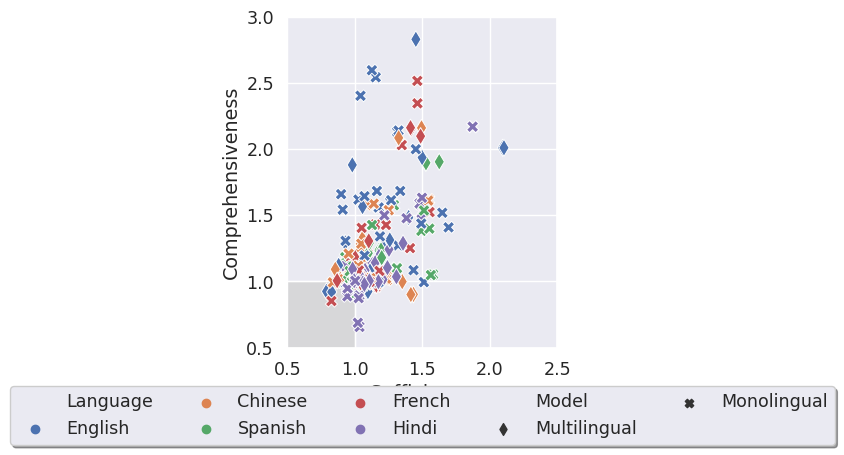

In [10]:
result = pd.read_csv('summary.csv', index_col='dataset')
result = result.loc[result.index.isin(all_data_list)] 
result=result.loc[result['model']!='xlm_roberta_large']
result = result.loc[result.index.isin(all_data_list)]

result=result.replace({"model": Multi_Mono_dict})
print(result)

##### for all models 
title = 'All models'
file_name = 'all_scatterplot'



# ###### for mBERT
# title = 'Multilingual BERT (mBERT)'
# result = result.loc[result['model'] =='mbert']
# file_name = 'mbert_scatterplot'



# ###### for XLM-R
# title = 'Multilingual RoBERTa (XLM-R)'
# result = result.loc[result['model'] =='xlm_roberta']
# file_name = 'xlm_roberta_scatterplot'



# ### FOR MONO RoBERTa
# title = 'Monolingual RoBERTa'
# file_name = 'roberta_scatterplot'
# result=result.loc[result['model']!='xlm_roberta']
# result = result.loc[result['model'].str.contains('roberta')]



# #### FOR MONO BERT
# title = 'Monolingual BERT'
# file_name = 'bert_scatterplot'
# result = result.loc[result['model'].str.contains('bert') | result['model'].str.contains('BETO')]
# result = result.loc[~result['model'].str.contains('roberta')]
# result = result.loc[~result['model'].str.contains('mbert')]

def df2plot(df):
    fig = plt.figure()
    plt.xlim(0.5, 2.5)
    plt.ylim(0.5, 3)
    sns.set(font_scale=1.15)
    if title == 'All models':
        sns.scatterplot(data=df, x="Sufficiency", y="Comprehensiveness", hue="Language", s=76, style="Model", markers={"Multilingual": "d", "Monolingual": "X"} )
    else:
        sns.scatterplot(data=df, x="Sufficiency", y="Comprehensiveness", hue="Language", s=66)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09),
          fancybox=True, shadow=True, ncol=5)
    someX, someY = 1, 1
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((0 - someX, 0 - someY), 2, 2, facecolor="lightgrey", alpha = 0.8, zorder=0))

    if title != 'All models': fig.suptitle(title, fontsize=16)

    fig.tight_layout() 
    plt.savefig(f"./scatterplot/{file_name}.png", format="png", bbox_inches="tight")
    plt.show()

Language_list = []
for ind in result.index:
    Language_list.append(find_key_by_value(language_data_dict, ind))


    
suff_list=[]
comp_list=[]
model_list=[]
df_temp_list = []
for fa in FA_list:
    # print(fa)
    suff = list(result[f'{fa}_Suff'])
    comp = list(result[f'{fa}_Comp'])
    model = list(result['model'])

    suff_list = suff_list+suff
    comp_list = comp_list+comp
    model_list = model_list + model
    print(len(suff_list), len(comp_list), len(model_list))

df = pd.DataFrame(list(zip(suff_list, comp_list, Language_list*5, model_list)),columns=['Sufficiency', 'Comprehensiveness','Language', 'Model'])


df2plot(df)

    

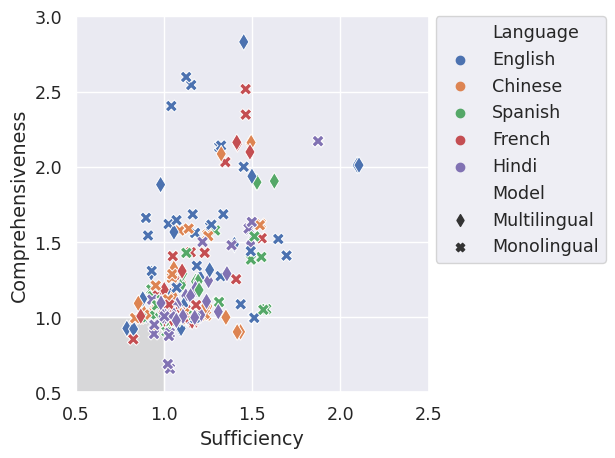

In [94]:
fig = plt.figure()
plt.xlim(0.5, 2.5)
plt.ylim(0.5, 3)
sns.set(font_scale=1.15)
sns.scatterplot(data=df, x="Sufficiency", y="Comprehensiveness", hue="Language", s=76, style="Model", markers=markers)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# handles, labels = fig.get_legend_handles_labels()
# fig.legend(handles[:3], labels[:3], ncol=1, loc='lower right', bbox_to_anchor=(1.2, 0.4)) #
# fig.legend(handles[3:], labels[3:], ncol=1, loc='lower right', bbox_to_anchor=(1.2, 0.1)) #
someX, someY = 1, 1
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0 - someX, 0 - someY), 2, 2, facecolor="lightgrey", alpha = 0.8, zorder=0))

if title != 'All models': fig.suptitle(title, fontsize=16)

fig.tight_layout() 
plt.savefig(f"./scatterplot/{file_name}.png", format="png", bbox_inches="tight")
plt.show()

==>> handles: [<matplotlib.collections.PathCollection object at 0x7fc74e4ef250>, <matplotlib.collections.PathCollection object at 0x7fc74e342010>, <matplotlib.collections.PathCollection object at 0x7fc74e33a6d0>, <matplotlib.collections.PathCollection object at 0x7fc74e33ef10>, <matplotlib.collections.PathCollection object at 0x7fc74e345150>]
==>> labels: ['English', 'Chinese', 'Spanish', 'French', 'Hindi']


<Figure size 640x480 with 0 Axes>

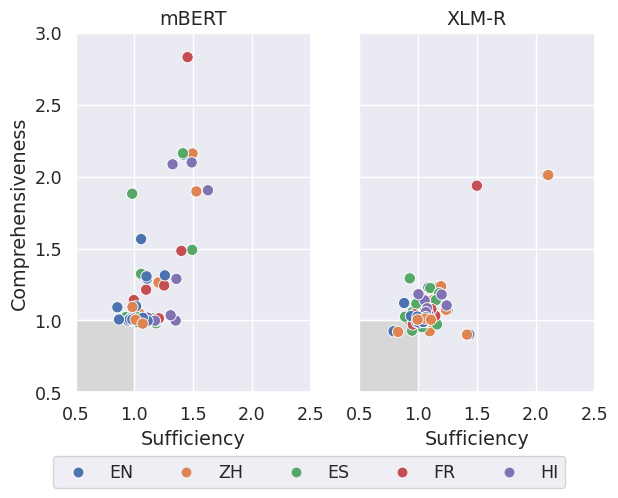

In [22]:
	
import matplotlib.patches as mpatches

fig = plt.figure()
sns.set(font_scale=1.15)

fig, (a1,a2) = plt.subplots(ncols=2, sharey=True)


someX, someY = 1, 1



sns.scatterplot(data=df_bert, x="Sufficiency", y="Comprehensiveness", hue="Language", s=66, ax=a1)
a1.set_xlim(0.5, 2.5)
a1.set_ylim(0.5, 3)
a1.title.set_text('mBERT')
currentAxis = plt.gca()
a1.add_patch(mpatches.Rectangle((0 - someX, 0 - someY), 2, 2, facecolor="lightgrey", alpha = 0.8, zorder=0))



sns.scatterplot(data=df_roberta, x="Sufficiency", y="Comprehensiveness", hue="Language", s=66, ax=a2)
a2.set_xlim(0.5, 2.5)
a2.set_ylim(0.5, 3)
a2.title.set_text('XLM-R')
currentAxis = plt.gca()

a2.add_patch(mpatches.Rectangle((0 - someX, 0 - someY), 2, 2, facecolor="lightgrey", alpha = 0.8, zorder=0))

handles, labels = a1.get_legend_handles_labels()
print(f"==>> handles: {handles}")
print(f"==>> labels: {labels}")
labels = ['EN', 'ZH', 'ES', 'FR', 'HI']
fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 0.045),
        fancybox=True, shadow=False, ncol=5)
a1.get_legend().remove()
a2.get_legend().remove()



#if title != 'All models': fig.suptitle(title, fontsize=16)

fig.tight_layout() 
plt.savefig("./scatterplot/mbert_roberta.png", format="png", dpi=400, bbox_inches="tight")
plt.show()


15 15
30 30
45 45
60 60
75 75


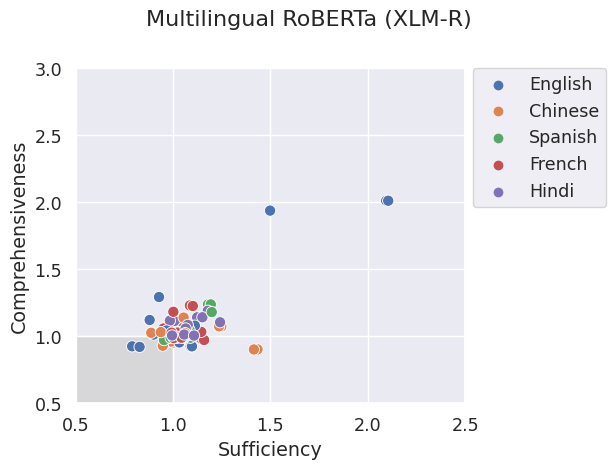

In [97]:
result = pd.read_csv('summary.csv', index_col='dataset')
result = result.loc[result.index.isin(all_data_list)] 
result=result.loc[result['model']!='xlm_roberta_large']
result = result.loc[result.index.isin(all_data_list)]

###### for XLM-R
title = 'Multilingual RoBERTa (XLM-R)'
result = result.loc[result['model'] =='xlm_roberta']
file_name = 'xlm_roberta_scatterplot'



# ### FOR MONO RoBERTa
# title = 'Monolingual RoBERTa'
# file_name = 'roberta_scatterplot'
# result=result.loc[result['model']!='xlm_roberta']
# result = result.loc[result['model'].str.contains('roberta')]



# #### FOR MONO BERT
# title = 'Monolingual BERT'
# file_name = 'bert_scatterplot'
# result = result.loc[result['model'].str.contains('bert') | result['model'].str.contains('BETO')]
# result = result.loc[~result['model'].str.contains('roberta')]
# result = result.loc[~result['model'].str.contains('mbert')]



Language_list = []
for ind in result.index:
    Language_list.append(find_key_by_value(language_data_dict, ind))


    
suff_list=[]
comp_list=[]
df_temp_list = []
for fa in FA_list:
    # print(fa)
    suff = list(result[f'{fa}_Suff'])
    comp = list(result[f'{fa}_Comp'])
    suff_list = suff_list+suff
    comp_list = comp_list+comp
    print(len(suff_list), len(comp_list))

df = pd.DataFrame(list(zip(suff_list, comp_list, Language_list*5)),columns=['Sufficiency', 'Comprehensiveness','Language'])


df2plot(df)

    

15 15
30 30
45 45
60 60
75 75


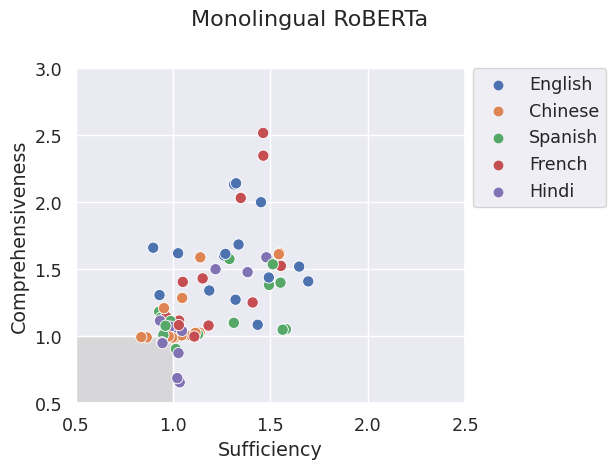

In [98]:
result = pd.read_csv('summary.csv', index_col='dataset')
result = result.loc[result.index.isin(all_data_list)] 
result=result.loc[result['model']!='xlm_roberta_large']
result = result.loc[result.index.isin(all_data_list)]



# ### FOR MONO RoBERTa
title = 'Monolingual RoBERTa'
file_name = 'roberta_scatterplot'
result=result.loc[result['model']!='xlm_roberta']
result = result.loc[result['model'].str.contains('roberta')]



# #### FOR MONO BERT
# title = 'Monolingual BERT'
# file_name = 'bert_scatterplot'
# result = result.loc[result['model'].str.contains('bert') | result['model'].str.contains('BETO')]
# result = result.loc[~result['model'].str.contains('roberta')]
# result = result.loc[~result['model'].str.contains('mbert')]



Language_list = []
for ind in result.index:
    Language_list.append(find_key_by_value(language_data_dict, ind))


    
suff_list=[]
comp_list=[]
df_temp_list = []
for fa in FA_list:
    # print(fa)
    suff = list(result[f'{fa}_Suff'])
    comp = list(result[f'{fa}_Comp'])
    suff_list = suff_list+suff
    comp_list = comp_list+comp
    print(len(suff_list), len(comp_list))

df = pd.DataFrame(list(zip(suff_list, comp_list, Language_list*5)),columns=['Sufficiency', 'Comprehensiveness','Language'])


df2plot(df)

    

15 15
30 30
45 45
60 60
75 75


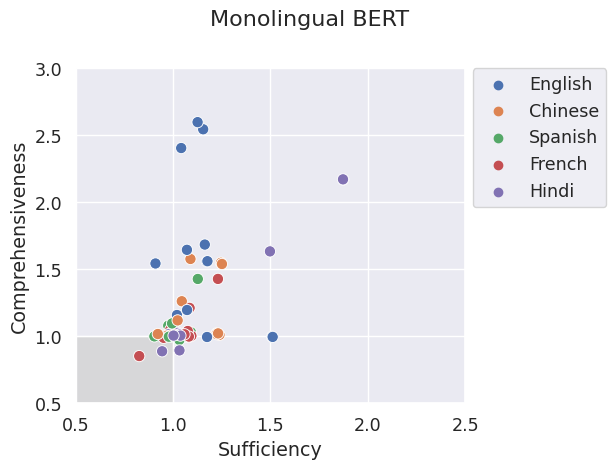

In [99]:
result = pd.read_csv('summary.csv', index_col='dataset')
result = result.loc[result.index.isin(all_data_list)] 
result=result.loc[result['model']!='xlm_roberta_large']
result = result.loc[result.index.isin(all_data_list)]



#### FOR MONO BERT
title = 'Monolingual BERT'
file_name = 'bert_scatterplot'
result = result.loc[result['model'].str.contains('bert') | result['model'].str.contains('BETO')]
result = result.loc[~result['model'].str.contains('roberta')]
result = result.loc[~result['model'].str.contains('mbert')]



Language_list = []
for ind in result.index:
    Language_list.append(find_key_by_value(language_data_dict, ind))


    
suff_list=[]
comp_list=[]
df_temp_list = []
for fa in FA_list:
    # print(fa)
    suff = list(result[f'{fa}_Suff'])
    comp = list(result[f'{fa}_Comp'])
    suff_list = suff_list+suff
    comp_list = comp_list+comp
    print(len(suff_list), len(comp_list))

df = pd.DataFrame(list(zip(suff_list, comp_list, Language_list*5)),columns=['Sufficiency', 'Comprehensiveness','Language'])


df2plot(df)

    

In [38]:
result = pd.read_csv('summary.csv', index_col='dataset')
result = result.loc[result.index.isin(all_data_list)] 

data_rep_dict = {'sst': 'SST', 'agnews': 'AG', 'multirc': 'MultiRC',
                 'ant': 'ANT', 'csl':'KR', 'ChnSentiCorp':'ChnSentiCorp',
                 'spanish_csl': 'CSL', 'spanish_paws': 'PAWS', 'spanish_xnli':'XNLI',
                 'french_csl': 'CSL', 'french_paws': 'PAWS', 'french_xnli':'XNLI',
                 'hindi_xnli': 'XNLI', 'hindi_bbc_nli':'NLI', 'hindi_bbc_topic':'Topic'
                 }

english_df = result[result.index.isin(english_data_list)]#.rename(index=data_rep_dict)
chinese_df = result[result.index.isin(chinese_data_list)]#.rename(index=data_rep_dict)
spanish_df = result[result.index.isin(spanish_data_list)]#.rename(index=data_rep_dict)
french_df = result[result.index.isin(french_data_list)]#.rename(index=data_rep_dict)
hindi_df = result[result.index.isin(hindi_data_list)]#.rename(index=data_rep_dict)
# arabic_df = result[result.index.isin(arabic_data_list)]#.rename(index=data_rep_dict)
# EngHin_df = result[result.index.isin(EngHin_data_list)]#.rename(index=data_rep_dict)

In [39]:

def get_agg_df(d_list, metrics):
    multi_agg_list = []
    mono_agg_list = []
    for d in d_list:
        aaa = result.loc[d]

        for fa in ['Attention', 'Scaled_Attention', 'Gradients', 'Integrated_Gradients', 'Deeplift']:
            col_name = f'{fa}_{metrics}'

            mbert = aaa.loc[aaa['model'] == 'mbert', col_name].item()
            xlm_roberta = aaa.loc[aaa['model'] == 'xlm_roberta', col_name].item()

            try: 
                if 'spanish' in d: bert = aaa.loc[aaa['model'] == 'BETO', col_name].item()
                else: bert = aaa.loc[aaa['model'] == 'bert', col_name].item()
            except:
                bert = aaa.loc[aaa['model'].str.contains('_bert'), col_name].item()

            try:    
                roberta = aaa.loc[aaa['model'] == 'roberta', col_name].item()
            except:
                roberta = aaa.loc[aaa['model'].str.contains('_roberta') & ~aaa['model'].str.contains('xlm'), col_name].item()

            multi_agg_list.append(mbert)
            multi_agg_list.append(xlm_roberta)

            mono_agg_list.append(bert)
            mono_agg_list.append(roberta)
            
    return mono_agg_list, multi_agg_list

In [40]:
a = result.loc['hindi_xnli']
a

,model,Attention_Suff,Scaled_Attention_Suff,Gradients_Suff,Integrated_Gradients_Suff,Deeplift_Suff,Attention_Comp,Scaled_Attention_Comp,Gradients_Comp,Integrated_Gradients_Comp,Deeplift_Comp,F1,Accuracy
dataset,,,,,,,,,,,,,
hindi_xnli,mbert,1.1363,1.1501,1.2088,1.3084,1.0710,1.0187,1.0159,1.0147,1.0359,0.9775,0.6754,0.6760
hindi_xnli,xlm_roberta,1.0099,0.9844,0.9850,1.0652,0.9954,1.1142,1.1161,1.0214,1.0578,1.0056,0.7235,0.7237
hindi_xnli,hindi_bert,1.0199,1.0234,1.0304,1.0419,1.0032,1.0266,1.0248,1.0126,1.0165,1.0048,0.6607,0.6607
hindi_xnli,hindi_roberta,1.4853,1.4795,1.0466,1.3833,1.0287,1.5834,1.5890,1.0399,1.4781,0.8741,0.6316,0.6314


In [41]:
def get_one_subplot(english_df, dataset_name, suff_or_comp):

    one_dataset_df = english_df[english_df.index == str(dataset_name)][['model', 'Attention_Suff', 'Scaled_Attention_Suff', 'Gradients_Suff', 'Integrated_Gradients_Suff', 'Deeplift_Suff',
                                                'Attention_Comp', 'Scaled_Attention_Comp', 'Gradients_Comp', 'Integrated_Gradients_Comp', 'Deeplift_Comp' ]]


    if suff_or_comp == 'Suff': one_dataset_df = one_dataset_df.filter(regex='^(?!.*Comp)')
    elif suff_or_comp == 'Comp': one_dataset_df = one_dataset_df.filter(regex='^(?!.*Suff)')

    
    else: print('sth wrong about defining Suff or Comp for suff_or_com')

    one_dataset_df['Multi_Mono'] = one_dataset_df['model'].apply(lambda x: Multi_Mono_dict[x])

    df_strip = one_dataset_df.melt(id_vars=['model', 'Multi_Mono'], var_name='FA', value_name=suff_or_comp)
    df_strip['FA'] = df_strip['FA'].str.replace(f'_{suff_or_comp}', '')
    df_strip['FA'] = df_strip['FA'].apply(lambda x: FA_rep_dict[x])
    
    

    df_strip = df_strip.rename(columns={'FA': f'{dataset_name}_FA', suff_or_comp: f'{dataset_name}_{suff_or_comp}', 'model': 'Model'})
    df_strip.loc[df_strip['Model'].str.contains('mbert'), 'Model'] = 'BERT'
    df_strip.loc[df_strip['Model'].str.contains('xlm_roberta'), 'Model'] = 'RoBERTa'

    df_strip.loc[df_strip['Model'].str.contains('roberta'), 'Model'] = 'RoBERTa'
    df_strip.loc[df_strip['Model'].str.contains('bert'), 'Model'] = 'BERT'
    df_strip.loc[df_strip['Model'].str.contains('BETO'), 'Model'] = 'BERT'
    
    return df_strip

In [42]:
def plot_one_lang(english_df, lang_name, english_data_list, suff_or_comp):

    mono_agg_list, multi_agg_list = get_agg_df(english_data_list, suff_or_comp)
    agg_df = pd.DataFrame(list(zip(multi_agg_list, mono_agg_list)), columns=['multi', 'mono'])
    p = stats.ttest_rel(multi_agg_list, mono_agg_list)
    p_value = p.pvalue
    print("".center(50, "-"))
    print('p value', p.pvalue, '  mono more faithful than multi', sum(agg_df['mono'] > agg_df['multi']))
    print("".center(50, "-"))

    df_list = []
    for dataset_name in english_data_list:
        
        temp_df = get_one_subplot(english_df, dataset_name, suff_or_comp)
        #print(f"==>> temp_df: {temp_df}")
        df_list.append(temp_df)

    df = pd.merge(df_list[0], df_list[1], on=["Model", "Multi_Mono"])
    #print(f"==>> df: {df}")
    df = pd.merge(df, df_list[2], on=["Model", "Multi_Mono"])
    #print(f"==>> df: {df}")

        
    hline_color = 'grey'
    hline_linestyle ='--'

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None,figsize=(7,3))

    markers = {"Multilingual": "s", "Monolingual": "X"} 
    sns.set(font_scale=1)
    sns.scatterplot(data=df, x=f'{english_data_list[0]}_FA', y=f'{english_data_list[0]}_{suff_or_comp}', hue='Model', style='Multi_Mono', s=100, ax=ax1, markers=markers)
    ax1.axhline(1, color=hline_color, linestyle=hline_linestyle)
    ax1.title.set_text(data_rep_dict.get(english_data_list[0]))
    ax1.set_ylabel('')
    ax1.set_xlabel('') # r'$\alpha$'

    sns.scatterplot(data=df, x=f'{english_data_list[1]}_FA', y=f'{english_data_list[1]}_{suff_or_comp}', hue='Model', style='Multi_Mono', s=100, ax=ax2, markers=markers)
    ax2.axhline(1, color=hline_color, linestyle=hline_linestyle)
    ax2.title.set_text(data_rep_dict.get(english_data_list[1]))
    ax2.set_ylabel('')
    ax2.set_xlabel('')

    sns.scatterplot(data=df, x=f'{english_data_list[2]}_FA', y=f'{english_data_list[2]}_{suff_or_comp}', hue='Model', style='Multi_Mono', s=100, ax=ax3, markers=markers)
    ax3.axhline(1, color=hline_color, linestyle=hline_linestyle)
    ax3.title.set_text(data_rep_dict.get(english_data_list[2]))
    ax3.set_ylabel('')
    ax3.set_xlabel('')

    # # set common x and y labels
    fig.text(0.5, -0.01, 'Feature Attributes', ha='center', fontsize = 13)
    fig.text(0.5, 1.01, lang_name, va='center', fontsize = 13) # rotation='vertical', 

    if suff_or_comp == 'Suff': 
        fig.text(-0.01, 0.5, f'Sufficiency', rotation='vertical', va='center', fontsize = 13) # rotation='vertical', ({p_value: .4f})
    elif suff_or_comp == 'Comp': 
        fig.text(-0.01, 0.5, f'Comprehensiveness', rotation='vertical', va='center', fontsize = 13) # ({p_value: .4f})

    # create a single legend for both subplots and adjust its position
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles[:3], labels[:3], ncol=1, loc='lower right', bbox_to_anchor=(1.2, 0.4)) #
    fig.legend(handles[3:], labels[3:], ncol=1, loc='lower right', bbox_to_anchor=(1.2, 0.1)) #

    try: ax1.get_legend().remove()
    except: pass
    try: ax2.get_legend().remove()
    except: pass
    try: ax3.get_legend().remove()
    except: pass

    for ax_i in [ax1, ax2, ax3]:
        ax_i.tick_params(axis='x') # , rotation=22

    fig.tight_layout() 
    plt.savefig(f"./scatterplot/{lang_name}_{suff_or_comp}.png", format="png", bbox_inches="tight")
    plt.show()


                         model      F1  Accuracy
dataset                                         
hindi_bbc_nli            mbert  0.7862    0.7864
hindi_bbc_nli      xlm_roberta  0.7887    0.7888
hindi_bbc_nli       hindi_bert  0.8124    0.8128
hindi_bbc_nli    hindi_roberta  0.7224    0.7022
hindi_bbc_topic          mbert  0.5123    0.5918
hindi_bbc_topic    xlm_roberta  0.5606    0.6425
hindi_bbc_topic     hindi_bert  0.6170    0.6753
hindi_bbc_topic  hindi_roberta  0.5268    0.6395
hindi_xnli               mbert  0.6754    0.6760
hindi_xnli         xlm_roberta  0.7235    0.7237
hindi_xnli          hindi_bert  0.6607    0.6607
hindi_xnli       hindi_roberta  0.6316    0.6314
--------------------------------------------------
p value 0.7130642661542947   mono more faithful than multi 10
--------------------------------------------------


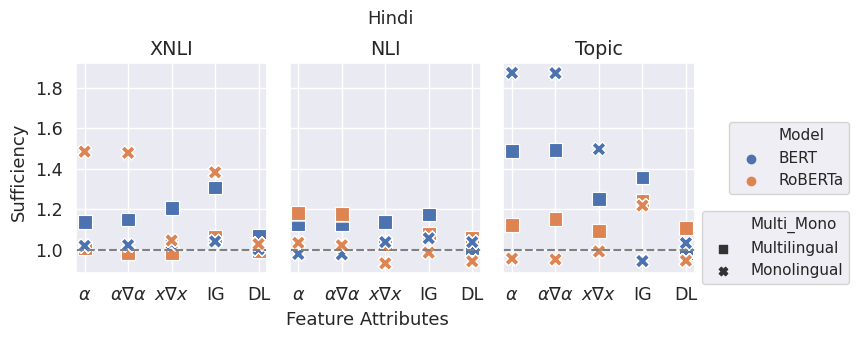

--------------------------------------------------
p value 0.38062481974072127   mono more faithful than multi 16
--------------------------------------------------


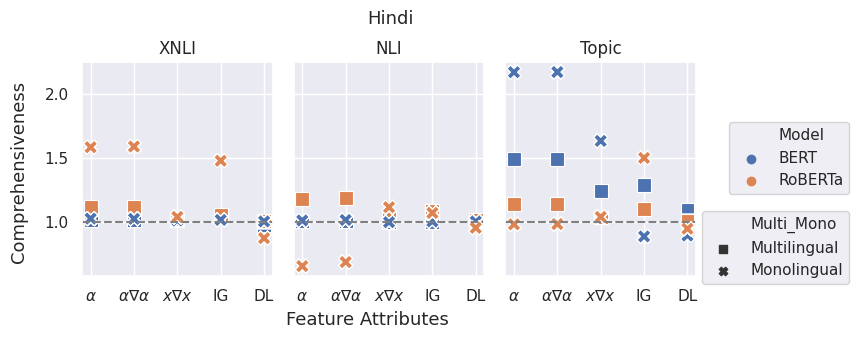

In [44]:
hindi_df_selected = hindi_df[~hindi_df['model'].str.contains('large', na=False)]#.reset_index()
print(hindi_df_selected[['model','F1', 'Accuracy']])
plot_one_lang(hindi_df_selected, 'Hindi', hindi_data_list, 'Suff')
plot_one_lang(hindi_df_selected, 'Hindi', hindi_data_list, 'Comp')

--------------------------------------------------
p value 0.7759558768991345   mono more faithful than multi 13
--------------------------------------------------


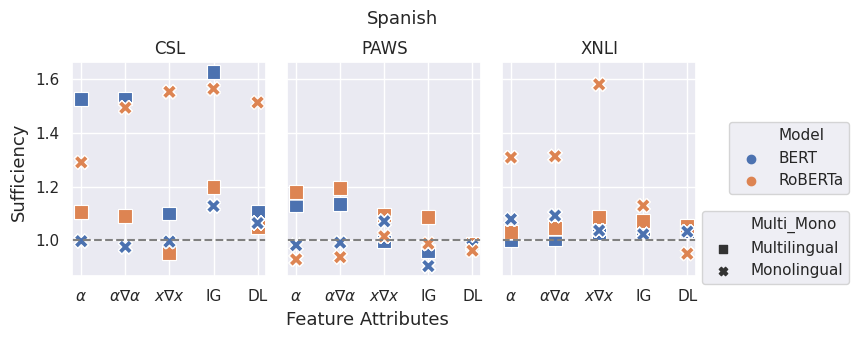

--------------------------------------------------
p value 0.6750768223035613   mono more faithful than multi 15
--------------------------------------------------


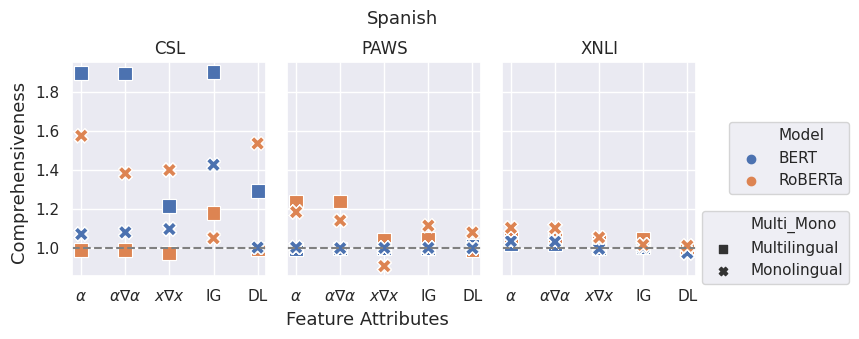

In [45]:
plot_one_lang(spanish_df, 'Spanish', spanish_data_list, 'Suff')
plot_one_lang(spanish_df, 'Spanish', spanish_data_list, 'Comp')

--------------------------------------------------
p value 0.22723212839432066   mono more faithful than multi 17
--------------------------------------------------


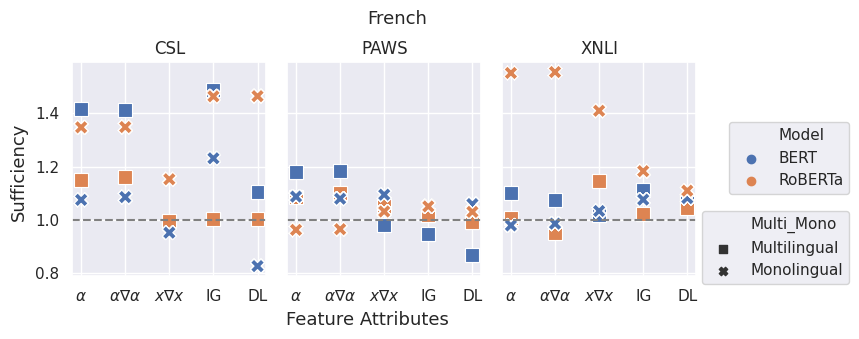

--------------------------------------------------
p value 0.21695967618165157   mono more faithful than multi 22
--------------------------------------------------


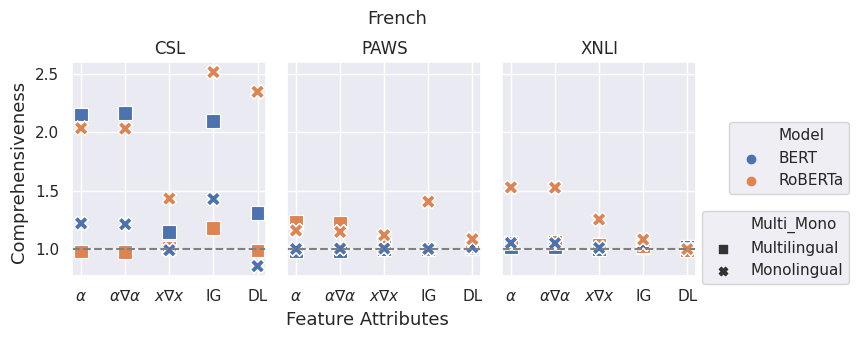

In [46]:
plot_one_lang(french_df, 'French', french_data_list, 'Suff')
plot_one_lang(french_df, 'French', french_data_list, 'Comp')

--------------------------------------------------
p value 0.6562588870313941   mono more faithful than multi 18
--------------------------------------------------


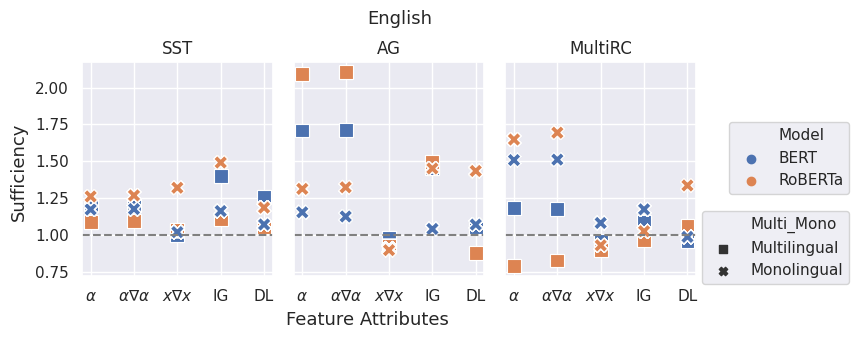

--------------------------------------------------
p value 0.02761248567445286   mono more faithful than multi 19
--------------------------------------------------


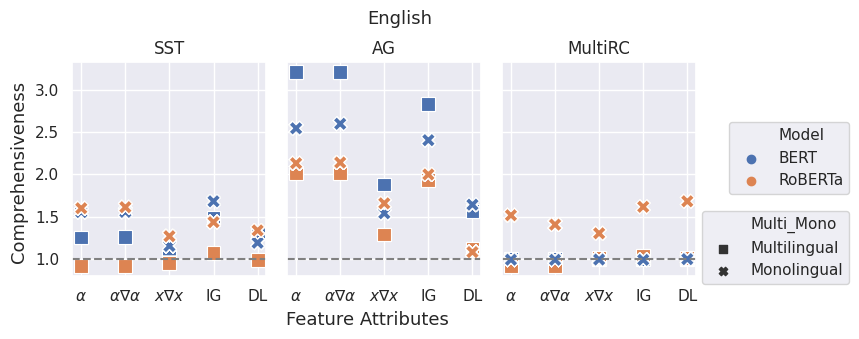

In [47]:
plot_one_lang(english_df, 'English', english_data_list, 'Suff')
plot_one_lang(english_df, 'English', english_data_list, 'Comp')


                        model      F1  Accuracy
dataset                                        
csl                     mbert  0.8420    0.8424
csl               xlm_roberta  0.8401    0.8403
csl              chinese_bert  0.8399    0.8400
csl           chinese_roberta  0.8443    0.8446
ant                     mbert  0.6282    0.7030
ant               xlm_roberta  0.6588    0.7139
ant              chinese_bert  0.6738    0.7237
ant           chinese_roberta  0.5241    0.6601
ChnSentiCorp            mbert  0.9119    0.9119
ChnSentiCorp      xlm_roberta  0.9217    0.9217
ChnSentiCorp     chinese_bert  0.9355    0.9356
ChnSentiCorp  chinese_roberta  0.9428    0.9428
--------------------------------------------------
p value 0.6977082327548904   mono more faithful than multi 19
--------------------------------------------------


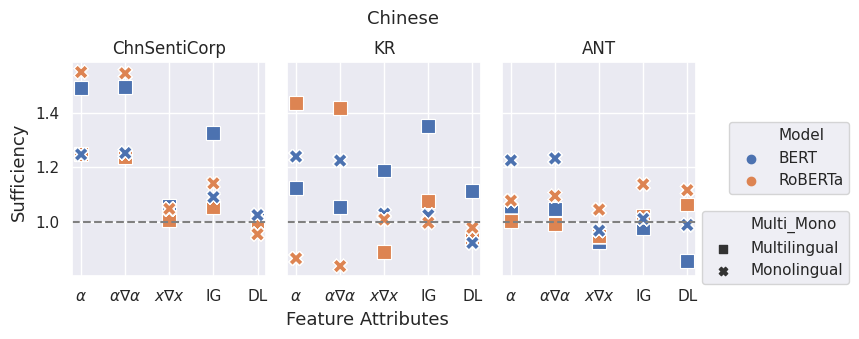

--------------------------------------------------
p value 0.7717638730915882   mono more faithful than multi 16
--------------------------------------------------


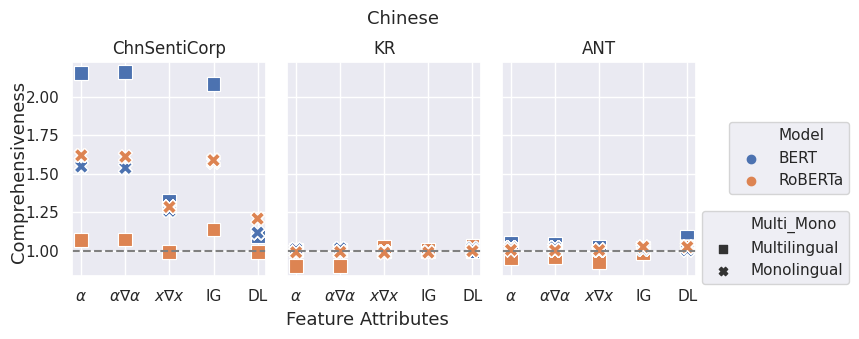

In [48]:
#print(chinese_df[['model','F1', 'Accuracy']])
chinese_df_selected = chinese_df[~chinese_df['model'].str.contains('large', na=False)]#.reset_index()
print(chinese_df_selected[['model','F1', 'Accuracy']])
plot_one_lang(chinese_df_selected, 'Chinese', chinese_data_list, 'Suff')
plot_one_lang(chinese_df_selected, 'Chinese', chinese_data_list, 'Comp')

In [1]:
from transformers import AutoTokenizer

In [3]:
text = "descripción por puntos de los defectos encontrados. en el corsair k70 lux rgb con switches mx silent que acabo de recibir : 1. tecla de bloqueo dañada. presenta una evidente imperfección visual. pintura desconchada / raspada. y tecla mellada. 2. la tecla d cuando la pulsas hace que se escuche un ruido raro metálico en el interior del teclado. no pasa con ninguna otra tecla. es muy molesto y puede ser indicativo de un defecto interno. 2. pequeño arañazo superficial en el aluminio cepillado. 3. la tecla mayúsculas derecha. está ligeramente levantada por el lado izquierdo. no quedando perfectamente a nivel. 4. ligeras diferencias de tacto entre teclas semejantes."

In [7]:
mbert = AutoTokenizer.from_pretrained('bert-base-multilingual-uncased')
print(mbert.tokenize('desagradable'))

['desa', '##grada', '##ble']


In [8]:
spanish_bert = AutoTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')
print(spanish_bert.tokenize('desagradable'))

['desagradable']
